In [2]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, Dropout, BatchNormalization
from keras.models import Model, load_model, Sequential
from keras.optimizers import SGD, Adam
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import keras.backend as K

%matplotlib inline


Using TensorFlow backend.


In [3]:
# load dataset
#parameters0 = np.loadtxt("C:\\Users\\Me\\Downloads\\BEC_data\\01MachineLearningNoMinUncert\\parameters.csv", delimiter=",")
# The first dataset contained 16 parameters, we will remove the 10 additional compared to the other days
#parameters0 = parameters0[:,[0,1,5,6,10,11]]
#dataset0 = np.loadtxt("C:\\Users\\Me\\Downloads\\BEC_data\\01MachineLearningNoMinUncert\\atom87_2\\combined.csv", delimiter=",")
parameters1 = np.loadtxt("C:\\Users\\Me\\Downloads\\BEC_data\\01MachineTheta5\\parameters.csv", delimiter=",")
dataset1 = np.loadtxt("C:\\Users\\Me\\Downloads\\BEC_data\\01MachineTheta5\\atom87\\combined.csv", delimiter=",")
# Remove parameters from day 1 that had a difference image size
parameters1 = parameters1[38:,:]
parameters2 = np.loadtxt("C:\\Users\\Me\\Downloads\\BEC_data\\02neldermead\\parameters.csv", delimiter=",")
dataset2 = np.loadtxt("C:\\Users\\Me\\Downloads\\BEC_data\\02neldermead\\atom87\\combined.csv", delimiter=",")
#parameters3 = np.loadtxt("C:\\Users\\Me\\Downloads\\BEC_data\\03MachineTheta10\\parameters.csv", delimiter=",")
#dataset3 = np.loadtxt("C:\\Users\\Me\\Downloads\\BEC_data\\03MachineTheta10\\atom87\\combined.csv", delimiter=",")
#parameters4 = np.loadtxt("C:\\Users\\Me\\Downloads\\BEC_data\\04MachineTheta10Param7\\parameters.csv", delimiter=",")
# Days 4 and 5 used an additional 7th parameter, which we'll remove
#parameters4 = parameters4[:, [0,1,2,3,4,5]]
#dataset4 = np.loadtxt("C:\\Users\\Me\\Downloads\\BEC_data\\04MachineTheta10Param7\\atom87\\combined.csv", delimiter=",")
#parameters5 = np.loadtxt("C:\\Users\\Me\\Downloads\\BEC_data\\01MachineTheta5\\parameters.csv", delimiter=",")
#parameters5 = parameters5[:, [0,1,2,3,4,5]]
#dataset5 = np.loadtxt("C:\\Users\\Me\\Downloads\\BEC_data\\01MachineTheta5\\atom87\\combined.csv", delimiter=",")
parameters = np.concatenate((parameters1, parameters2), axis=0)
dataset = np.concatenate((dataset1, dataset2), axis=0)
# split into input (X) and output (Y) variables
X_train, X_test, Y_train, Y_test = train_test_split(parameters, dataset, test_size=0.1)

In [12]:
# create model
def create_model(input_size, layer_sizes, residual=0, dropout=0, drop_rate=0.1):
    # This function creates and returns a model of a network based on the input parameters provided
    # input_size is the number of input parameters to the network
    # layer_size is an array with each number specifying the number of neurons in each successive layer
    # residual is not yet implemented
    # dropout specifies whether to use dropout (0=no, 1=yes)
    # drop_rate is the rate of dropout to apply if dropout=1
    
    num_layers = len(layer_sizes)
    
    # create the input tensor and add batch normalisation
    inputs = Input(shape=(input_size,))
    x = BatchNormalization(input_shape=(input_size,))(inputs)
       
    # The first layer
    x = Dense(layer_sizes[0], activation='relu')(x)
    
    #Then loop over the intermediate layers
    for layer in range(1,(num_layers-1)):
        if residual:
            #Not yet implimented
            #x = res_block(x, layer_sizes[layer])
            None
        else:
            x = Dense(layer_sizes[layer], activation='relu')(x)
            if dropout:
                x = Dropout(drop_rate)(x)
            
    #Then add the final output layer
    x = Dense(layer_sizes[num_layers-1], activation='sigmoid')(x)
    
    #Convert into a model
    model = Model(inputs=inputs, outputs=x)
    
    #And compile the model
    opt = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])        
    
    return model

In [14]:
# Create the model, and then fit it
model = create_model(input_size=6, layer_sizes=[6, 16, 32, 64, 128, 256, 512, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 8048, 31020], dropout=0, drop_rate=0.1)
model.fit(X_train, Y_train, epochs=10000)

Epoch 1/10000
315/315 [==============================] - 54s - loss: 0.3308 - acc: 0.0000e+00    
Epoch 2/10000
315/315 [==============================] - 47s - loss: 0.3307 - acc: 0.0000e+00    
Epoch 3/10000
315/315 [==============================] - 47s - loss: 0.3307 - acc: 0.0000e+00    
Epoch 4/10000
315/315 [==============================] - 47s - loss: 0.3307 - acc: 0.0000e+00    
Epoch 5/10000
315/315 [==============================] - 47s - loss: 0.3307 - acc: 0.0000e+00    
Epoch 6/10000
315/315 [==============================] - 47s - loss: 0.3306 - acc: 0.0000e+00    
Epoch 7/10000
315/315 [==============================] - 47s - loss: 0.3306 - acc: 0.0000e+00    
Epoch 8/10000
315/315 [==============================] - 48s - loss: 0.3305 - acc: 0.0000e+00    
Epoch 9/10000
315/315 [==============================] - 48s - loss: 0.3302 - acc: 0.0000e+00    
Epoch 10/10000
315/315 [==============================] - 48s - loss: 0.3297 - acc: 0.0000e+00    
Epoch 11/10000
315/

315/315 [==============================] - 47s - loss: 0.1056 - acc: 0.0000e+00    
Epoch 84/10000
315/315 [==============================] - 47s - loss: 0.1049 - acc: 0.0000e+00    
Epoch 85/10000
315/315 [==============================] - 47s - loss: 0.1049 - acc: 0.0000e+00    
Epoch 86/10000
315/315 [==============================] - 46s - loss: 0.1048 - acc: 0.0000e+00    
Epoch 87/10000
315/315 [==============================] - 47s - loss: 0.1043 - acc: 0.0000e+00    
Epoch 88/10000
315/315 [==============================] - 47s - loss: 0.1052 - acc: 0.0000e+00    
Epoch 89/10000
315/315 [==============================] - 46s - loss: 0.1053 - acc: 0.0000e+00    
Epoch 90/10000
315/315 [==============================] - 47s - loss: 0.1049 - acc: 0.0000e+00    
Epoch 91/10000
315/315 [==============================] - 47s - loss: 0.1050 - acc: 0.0000e+00    
Epoch 92/10000
315/315 [==============================] - 46s - loss: 0.1051 - acc: 0.0000e+00    
Epoch 93/10000
315/315 [=

315/315 [==============================] - 47s - loss: 0.1045 - acc: 0.0000e+00    
Epoch 166/10000
315/315 [==============================] - 47s - loss: 0.1046 - acc: 0.0000e+00    
Epoch 167/10000
315/315 [==============================] - 47s - loss: 0.1058 - acc: 0.0000e+00    
Epoch 168/10000
315/315 [==============================] - 46s - loss: 0.1029 - acc: 0.0000e+00    
Epoch 169/10000
315/315 [==============================] - 46s - loss: 0.1054 - acc: 0.0000e+00    
Epoch 170/10000
315/315 [==============================] - 47s - loss: 0.1036 - acc: 0.0000e+00    
Epoch 171/10000
315/315 [==============================] - 46s - loss: 0.1042 - acc: 0.0000e+00    
Epoch 172/10000
315/315 [==============================] - 46s - loss: 0.1038 - acc: 0.0000e+00    
Epoch 173/10000
315/315 [==============================] - 46s - loss: 0.1034 - acc: 0.0000e+00    
Epoch 174/10000
315/315 [==============================] - 47s - loss: 0.1031 - acc: 0.0000e+00    
Epoch 175/10000


315/315 [==============================] - 47s - loss: 0.1039 - acc: 0.0000e+00    
Epoch 248/10000
315/315 [==============================] - 46s - loss: 0.1034 - acc: 0.0000e+00    
Epoch 249/10000
315/315 [==============================] - 46s - loss: 0.1023 - acc: 0.0000e+00    
Epoch 250/10000
315/315 [==============================] - 46s - loss: 0.1026 - acc: 0.0000e+00    
Epoch 251/10000
315/315 [==============================] - 47s - loss: 0.1025 - acc: 0.0000e+00    
Epoch 252/10000
315/315 [==============================] - 46s - loss: 0.1028 - acc: 0.0000e+00    
Epoch 253/10000
315/315 [==============================] - 47s - loss: 0.1023 - acc: 0.0000e+00    
Epoch 254/10000
315/315 [==============================] - 47s - loss: 0.1032 - acc: 0.0000e+00    
Epoch 255/10000
315/315 [==============================] - 46s - loss: 0.1032 - acc: 0.0000e+00    
Epoch 256/10000
315/315 [==============================] - 46s - loss: 0.1022 - acc: 0.0000e+00    
Epoch 257/10000


315/315 [==============================] - 46s - loss: 0.1020 - acc: 0.0000e+00    
Epoch 330/10000
315/315 [==============================] - 46s - loss: 0.1019 - acc: 0.0000e+00    
Epoch 331/10000
315/315 [==============================] - 46s - loss: 0.1030 - acc: 0.0000e+00    
Epoch 332/10000
315/315 [==============================] - 46s - loss: 0.1021 - acc: 0.0000e+00    
Epoch 333/10000
315/315 [==============================] - 46s - loss: 0.1020 - acc: 0.0000e+00    
Epoch 334/10000
315/315 [==============================] - 46s - loss: 0.1016 - acc: 0.0000e+00    
Epoch 335/10000
315/315 [==============================] - 47s - loss: 0.1026 - acc: 0.0000e+00    
Epoch 336/10000
315/315 [==============================] - 46s - loss: 0.1022 - acc: 0.0000e+00    
Epoch 337/10000
315/315 [==============================] - 47s - loss: 0.1017 - acc: 0.0000e+00    
Epoch 338/10000
315/315 [==============================] - 47s - loss: 0.1023 - acc: 0.0000e+00    
Epoch 339/10000


315/315 [==============================] - 46s - loss: 0.1016 - acc: 0.0000e+00    
Epoch 412/10000
315/315 [==============================] - 46s - loss: 0.1019 - acc: 0.0000e+00    
Epoch 413/10000
315/315 [==============================] - 46s - loss: 0.1012 - acc: 0.0000e+00    
Epoch 414/10000
315/315 [==============================] - 47s - loss: 0.1018 - acc: 0.0000e+00    
Epoch 415/10000
315/315 [==============================] - 46s - loss: 0.1017 - acc: 0.0000e+00    
Epoch 416/10000
315/315 [==============================] - 47s - loss: 0.1029 - acc: 0.0000e+00    
Epoch 417/10000
315/315 [==============================] - 46s - loss: 0.1025 - acc: 0.0000e+00    
Epoch 418/10000
315/315 [==============================] - 47s - loss: 0.1040 - acc: 0.0000e+00    
Epoch 419/10000
315/315 [==============================] - 46s - loss: 0.1018 - acc: 0.0000e+00    
Epoch 420/10000
315/315 [==============================] - 47s - loss: 0.1019 - acc: 0.0000e+00    
Epoch 421/10000


315/315 [==============================] - 46s - loss: 0.1025 - acc: 0.0000e+00    
Epoch 494/10000
315/315 [==============================] - 47s - loss: 0.1012 - acc: 0.0000e+00    
Epoch 495/10000
315/315 [==============================] - 47s - loss: 0.1017 - acc: 0.0000e+00    
Epoch 496/10000
315/315 [==============================] - 46s - loss: 0.1035 - acc: 0.0000e+00    
Epoch 497/10000
315/315 [==============================] - 46s - loss: 0.1021 - acc: 0.0000e+00    
Epoch 498/10000
315/315 [==============================] - 47s - loss: 0.1019 - acc: 0.0000e+00    
Epoch 499/10000
315/315 [==============================] - 46s - loss: 0.1014 - acc: 0.0000e+00    
Epoch 500/10000
315/315 [==============================] - 46s - loss: 0.1021 - acc: 0.0000e+00    
Epoch 501/10000
315/315 [==============================] - 47s - loss: 0.1025 - acc: 0.0000e+00    
Epoch 502/10000
315/315 [==============================] - 46s - loss: 0.1029 - acc: 0.0000e+00    
Epoch 503/10000


315/315 [==============================] - 47s - loss: 0.1030 - acc: 0.0000e+00    
Epoch 576/10000
315/315 [==============================] - 46s - loss: 0.1010 - acc: 0.0000e+00    
Epoch 577/10000
315/315 [==============================] - 47s - loss: 0.1013 - acc: 0.0000e+00    
Epoch 578/10000
315/315 [==============================] - 47s - loss: 0.1016 - acc: 0.0000e+00    
Epoch 579/10000
315/315 [==============================] - 46s - loss: 0.1015 - acc: 0.0000e+00    
Epoch 580/10000
315/315 [==============================] - 48s - loss: 0.1021 - acc: 0.0000e+00    
Epoch 581/10000
315/315 [==============================] - 46s - loss: 0.1014 - acc: 0.0000e+00    
Epoch 582/10000
315/315 [==============================] - 47s - loss: 0.1023 - acc: 0.0000e+00    
Epoch 583/10000
315/315 [==============================] - 47s - loss: 0.1019 - acc: 0.0000e+00    
Epoch 584/10000
315/315 [==============================] - 47s - loss: 0.1033 - acc: 0.0000e+00    
Epoch 585/10000


KeyboardInterrupt: 

In [15]:
# evaluate the model
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

35/35 [==============================] - 1s     

acc: 0.00%


Text(0.5,1,'Actual')

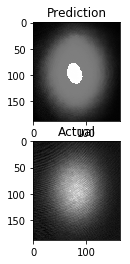

In [16]:
# calculate predictions
predictions = model.predict(X_test)
# round predictions (if needed)
rounded = [round(x[0]) for x in predictions]
# Display a predictd output next to the actual output
im_pred = predictions[1,:].reshape(188,165)
im_act = Y_test[1,:].reshape(188,165)
plt.gray()
f, axarr = plt.subplots(2, sharex=False)
axarr[0].imshow(im_pred)
axarr[0].set_title('Prediction')
axarr[1].imshow(im_act)
axarr[1].set_title('Actual')

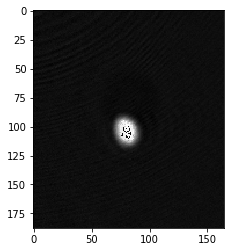

In [12]:
temp = dataset[100,:].reshape(188,165)
imshow(temp)